In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tqdm

import sys
sys.path.append('../')
from model import nn_tools
from utils import utils
import matplotlib as mpl

/n/home12/cfpark00/venv1/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: rch is an invalid version and will not be supported in a future release
  warnings.warn(
/n/home12/cfpark00/venv1/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: rch is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
def get_step(ckpt_path):
    return int(os.path.split(ckpt_path)[1].split("step=")[1].split(".ckpt")[0])

In [3]:
ts=torch.linspace(0,1,1000)

In [5]:
ckpt_dir="../data/comet_logs/Mstar2Mcdm-2D-new/2fc67fd4fd2741f4bf2735b7229770a5/checkpoints/"
gamma_min=-13.3
gamma_max=13.3

gammas={}
for ckpt_path in tqdm.tqdm(glob.glob(os.path.join(ckpt_dir,"*.ckpt"))):
    step=get_step(ckpt_path)
    ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
    std_gamma={}
    for key,val in ckpt["state_dict"].items():
        if "model.gamma" in key:
            std_gamma[key.split("model.gamma.")[1]]=val
    get_gamma=nn_tools.NNSchedule(gamma_min, gamma_max,setting=2)
    get_gamma.load_state_dict(std_gamma)
    gamma=get_gamma(ts[:,None])[:,0]
    gamma=utils.to_np(gamma)
    gammas[step]=gamma
#sort dict by step
gammas=dict(sorted(gammas.items(), key=lambda item: item[0]))

  2%|▎         | 1/40 [00:00<00:15,  2.49it/s]

NNSchedule: setting 2


  5%|▌         | 2/40 [00:01<00:28,  1.34it/s]

NNSchedule: setting 2


  8%|▊         | 3/40 [00:02<00:32,  1.15it/s]

NNSchedule: setting 2


 10%|█         | 4/40 [00:03<00:31,  1.16it/s]

NNSchedule: setting 2


 12%|█▎        | 5/40 [00:04<00:31,  1.13it/s]

NNSchedule: setting 2


 15%|█▌        | 6/40 [00:05<00:31,  1.09it/s]

NNSchedule: setting 2


 18%|█▊        | 7/40 [00:06<00:32,  1.01it/s]

NNSchedule: setting 2


 20%|██        | 8/40 [00:07<00:32,  1.02s/it]

NNSchedule: setting 2


 22%|██▎       | 9/40 [00:08<00:31,  1.02s/it]

NNSchedule: setting 2


 25%|██▌       | 10/40 [00:09<00:29,  1.00it/s]

NNSchedule: setting 2


 28%|██▊       | 11/40 [00:10<00:27,  1.04it/s]

NNSchedule: setting 2


 30%|███       | 12/40 [00:11<00:26,  1.06it/s]

NNSchedule: setting 2


 32%|███▎      | 13/40 [00:12<00:25,  1.07it/s]

NNSchedule: setting 2


 35%|███▌      | 14/40 [00:13<00:25,  1.03it/s]

NNSchedule: setting 2


 38%|███▊      | 15/40 [00:14<00:24,  1.03it/s]

NNSchedule: setting 2


 40%|████      | 16/40 [00:15<00:23,  1.03it/s]

NNSchedule: setting 2


 42%|████▎     | 17/40 [00:16<00:23,  1.03s/it]

NNSchedule: setting 2


 45%|████▌     | 18/40 [00:17<00:22,  1.00s/it]

NNSchedule: setting 2


 48%|████▊     | 19/40 [00:18<00:20,  1.03it/s]

NNSchedule: setting 2


 50%|█████     | 20/40 [00:19<00:20,  1.02s/it]

NNSchedule: setting 2


 52%|█████▎    | 21/40 [00:20<00:18,  1.02it/s]

NNSchedule: setting 2


 55%|█████▌    | 22/40 [00:20<00:17,  1.05it/s]

NNSchedule: setting 2


 57%|█████▊    | 23/40 [00:21<00:15,  1.09it/s]

NNSchedule: setting 2


 60%|██████    | 24/40 [00:23<00:17,  1.10s/it]

NNSchedule: setting 2


 62%|██████▎   | 25/40 [00:24<00:15,  1.01s/it]

NNSchedule: setting 2


 65%|██████▌   | 26/40 [00:25<00:13,  1.03it/s]

NNSchedule: setting 2


 68%|██████▊   | 27/40 [00:26<00:12,  1.03it/s]

NNSchedule: setting 2


 70%|███████   | 28/40 [00:26<00:11,  1.03it/s]

NNSchedule: setting 2


 72%|███████▎  | 29/40 [00:27<00:10,  1.07it/s]

NNSchedule: setting 2


 75%|███████▌  | 30/40 [00:28<00:09,  1.03it/s]

NNSchedule: setting 2


 78%|███████▊  | 31/40 [00:29<00:08,  1.06it/s]

NNSchedule: setting 2


 80%|████████  | 32/40 [00:30<00:08,  1.00s/it]

NNSchedule: setting 2


 82%|████████▎ | 33/40 [00:31<00:06,  1.01it/s]

NNSchedule: setting 2


 85%|████████▌ | 34/40 [00:32<00:05,  1.01it/s]

NNSchedule: setting 2


 88%|████████▊ | 35/40 [00:33<00:04,  1.04it/s]

NNSchedule: setting 2


 90%|█████████ | 36/40 [00:34<00:03,  1.06it/s]

NNSchedule: setting 2


 92%|█████████▎| 37/40 [00:35<00:02,  1.02it/s]

NNSchedule: setting 2


 95%|█████████▌| 38/40 [00:36<00:01,  1.05it/s]

NNSchedule: setting 2


 98%|█████████▊| 39/40 [00:37<00:00,  1.05it/s]

NNSchedule: setting 2


100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

NNSchedule: setting 2


Text(0.5, 1.0, 'NN Schedule 2')

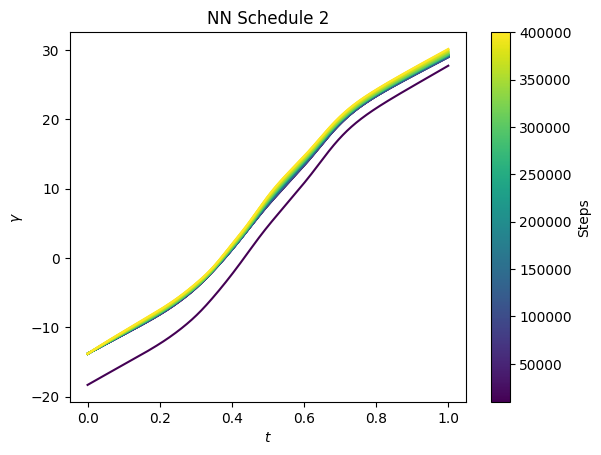

In [6]:
vmin,vmax=min(gammas.keys()),max(gammas.keys())
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=plt.get_cmap("viridis")
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-vmin)/(vmax-vmin)))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("NN Schedule 2")

In [9]:
ckpt_dir="../data/comet_logs/Mstar2Mcdm-2D-new/febe0f9ed19a441390ed0fb6d36a458d/checkpoints/"
gamma_min=-13.3
gamma_max=13.3

gammas={}
for ckpt_path in tqdm.tqdm(glob.glob(os.path.join(ckpt_dir,"*.ckpt"))):
    step=get_step(ckpt_path)
    ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
    std_gamma={}
    for key,val in ckpt["state_dict"].items():
        if "model.gamma" in key:
            std_gamma[key.split("model.gamma.")[1]]=val
    get_gamma=nn_tools.LearnedLinearSchedule(gamma_min,gamma_max)
    get_gamma.load_state_dict(std_gamma)
    gamma=get_gamma(ts[:,None])[:,0]
    gamma=utils.to_np(gamma)
    gammas[step]=gamma
#sort dict by step
gammas=dict(sorted(gammas.items(), key=lambda item: item[0]))

100%|██████████| 45/45 [00:41<00:00,  1.10it/s]


Text(0.5, 1.0, 'Learned Linear Schedule')

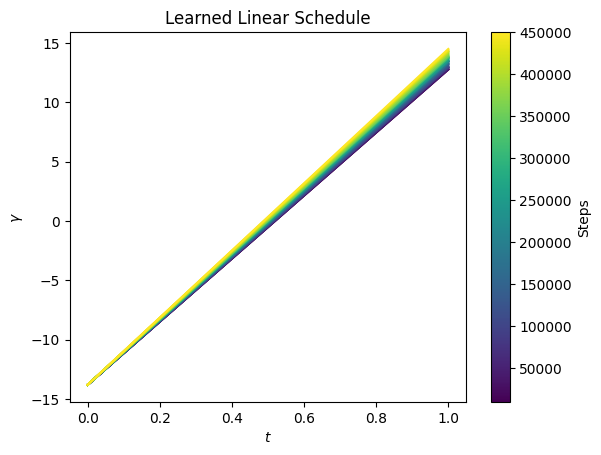

In [12]:
vmin,vmax=min(gammas.keys()),max(gammas.keys())
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=plt.get_cmap("viridis")
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-vmin)/(vmax-vmin)))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned Linear Schedule")

Text(0.5, 1.0, 'Learned Linear Schedule')

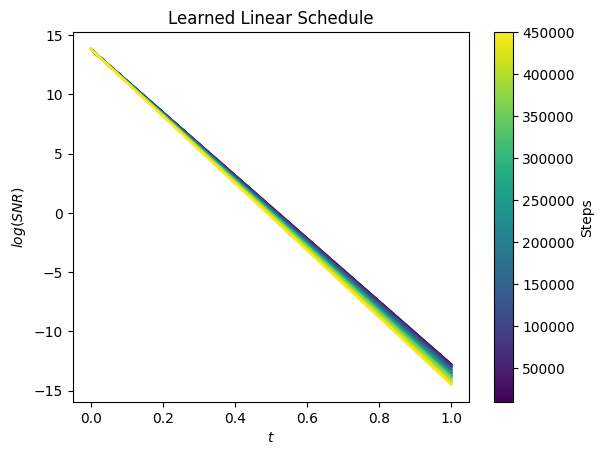

In [13]:
vmin,vmax=min(gammas.keys()),max(gammas.keys())
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=plt.get_cmap("viridis")
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,-gamma,color=cmap((step-vmin)/(vmax-vmin)))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$log(SNR)$")
plt.title("Learned Linear Schedule")

In [12]:
ckpt_dir="../data/comet_logs/Mstar2Mcdm-2D-new/8eb7874f35f94f5c9089cc63e84c95fb/checkpoints/"
gamma_min=-13.3
gamma_max=5.0

gammas={}
for ckpt_path in tqdm.tqdm(glob.glob(os.path.join(ckpt_dir,"*.ckpt"))):
    step=get_step(ckpt_path)
    ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
    std_gamma={}
    for key,val in ckpt["state_dict"].items():
        if "model.gamma" in key:
            std_gamma[key.split("model.gamma.")[1]]=val
    get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max)
    get_gamma.load_state_dict(std_gamma)
    gamma=get_gamma(ts[:,None])[:,0]
    gamma=utils.to_np(gamma)
    gammas[step]=gamma
#sort dict by step
gammas=dict(sorted(gammas.items(), key=lambda item: item[0]))

100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Text(0.5, 1.0, 'Learned NN Schedule')

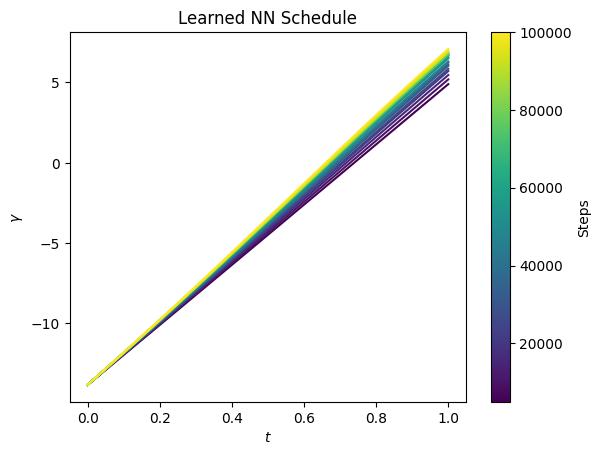

In [13]:
vmin,vmax=min(gammas.keys()),max(gammas.keys())
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=plt.get_cmap("viridis")
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-vmin)/(vmax-vmin)))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned NN Schedule")

NameError: name 'min_step' is not defined

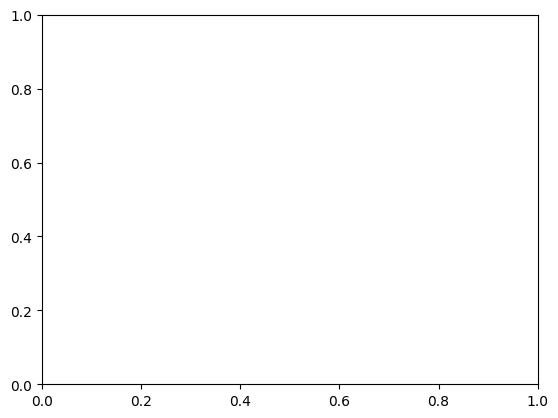

In [14]:
cmap=plt.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(gammas.keys()), vmax=max(gammas.keys()))
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-min_step)/step_range))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned NN Schedule")

In [240]:
import importlib
importlib.reload(nn_tools)

<module 'model.nn_tools' from '/n/home12/cfpark00/Diffusion/vdm4cdm/analysis/../model/nn_tools.py'>

In [241]:
gamma_min=-12.5
gamma_max=5.5
ts=torch.linspace(0,1,1000)
get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max,mid_dim=2,gamma_min_max=-8)
gamma=utils.to_np(get_gamma(ts[:,None])[:,0])
ys=ts

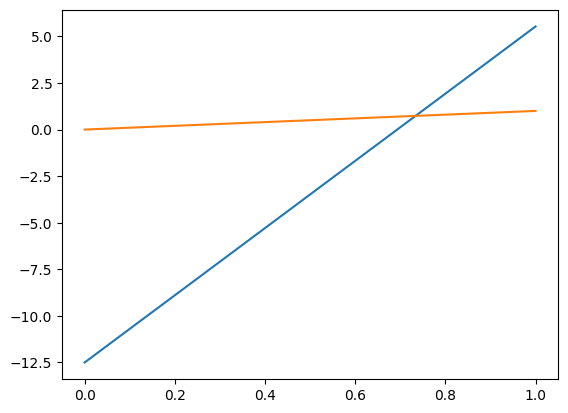

In [242]:
plt.plot(ts,gamma)
plt.plot(ts,ys)

In [243]:
opt=torch.optim.Adam(get_gamma.parameters(),lr=1e-3)

In [247]:
for i in range(10000):
    opt.zero_grad()
    gamma=get_gamma(ts[:,None])[:,0]
    loss=torch.mean((gamma[500:]-ys[500:])**2)
    loss.backward()
    opt.step()
    if i%100==0:
        print(loss.item())

0.9317201375961304
0.9069150686264038
0.8824976086616516
0.8584659695625305
0.8348183035850525
0.8115532994270325
0.7886690497398376
0.7661638855934143
0.7440364956855774
0.7222849130630493
0.7009072303771973
0.6799019575119019
0.6592671871185303
0.6390013694763184
0.6191032528877258
0.5995703339576721
0.5804011225700378
0.5615940093994141
0.5431466698646545
0.5250583291053772
0.5073266625404358
0.4899495840072632
0.4729260206222534
0.4562534689903259
0.4399302899837494
0.42395496368408203
0.4083256423473358
0.3930397629737854
0.37809619307518005
0.36349281668663025
0.3492279052734375
0.3352990746498108
0.3217047154903412
0.3084426522254944
0.295510858297348
0.2829071581363678
0.27062955498695374
0.2586759328842163
0.24704387784004211
0.23573122918605804
0.22473590075969696
0.21405525505542755
0.2036868929862976
0.19362865388393402
0.18387767672538757
0.17443150281906128
0.16530300676822662
0.15647317469120026
0.14793790876865387
0.13969412446022034
0.13173934817314148
0.12407055497169

(tensor(-8., grad_fn=<SelectBackward0>),
 tensor(1.0139, grad_fn=<SelectBackward0>))

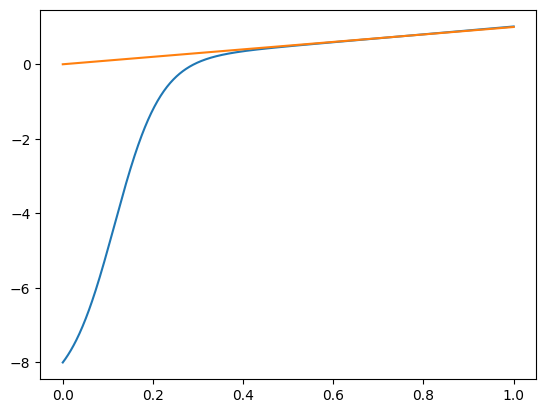

In [248]:
ts_np=utils.to_np(ts)
plt.plot(ts_np,utils.to_np(gamma))
plt.plot(ts_np,utils.to_np(ys))
gamma[0],gamma[-1]

In [175]:
ts=torch.linspace(0,1,1000)
get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max,mid_dim=2)
with torch.no_grad():
    #print(get_gamma.l2.weight.shape)
    get_gamma.l1.weight[...]=0
    get_gamma.l1.bias[...]=0
    get_gamma.l2.weight[0,0]=10
    get_gamma.l2.weight[1,0]=10
    get_gamma.l2.bias[0]=10*(-0.3)
    get_gamma.l2.bias[1]=10*(0.3)
    get_gamma.l3.weight[0,0]=20
    get_gamma.l3.weight[0,1]=20
gamma=utils.to_np(get_gamma(ts[:,None])[:,0])

In [176]:
(torch.abs(get_gamma.l3.weight[0,1])+torch.abs(get_gamma.l3.weight[0,0]))/2

tensor(20., grad_fn=<DivBackward0>)

19.981735

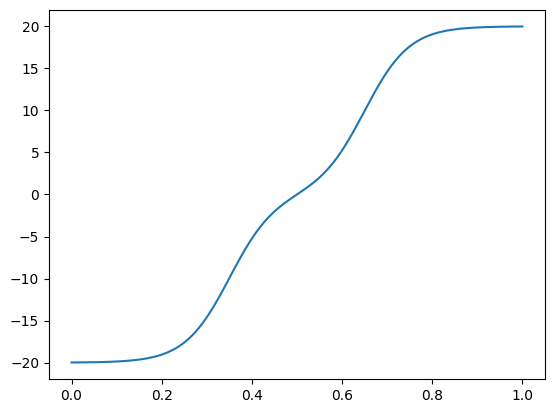

In [177]:
plt.plot(ts,gamma)
gamma[-1]